# Exploration of Grayscale

We had seen several people online say that converting an image to grayscale can improve classification accuracy
as it reduces the dementionality of the input image making feature detection easier.

This notebook is a conversion of the model listed in our [exploration file](./exploration.ipynb) with an additional
data processing step `cv.cvtColor(image, cv.COLOR_BGR2GRAY)`. 

In [1]:
# STDLIB
import os
import typing
import csv
# Packages
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split

In [2]:
DATA_DIR = "GTSRB"
TRAINING_DATA_PATH = os.path.join(DATA_DIR, "Final_Training/Images")
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  4


In [3]:
def readTrafficSigns(rootpath: str) -> typing.Tuple[list[cv.Mat], list[str]]:
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    for c in range(0,43):
        prefix = rootpath + '/' + format(c, '05d') + '/' # subdirectory for class
        with open(prefix + 'GT-'+ format(c, '05d') + '.csv') as gtFile:
            gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
            next(gtReader) # skip header
            # loop over all images in current annotations file
            for row in gtReader:
                image = cv.imread(prefix + row[0]) # read image, the 1th column is the filename
                image = cv.resize(image, (32,32)) # resize to 32x32
                # image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # convert to grayscale
                images.append(image)
                labels.append(row[7]) # the 8th column is the label
    return images, labels



raw_images, raw_labels = readTrafficSigns(TRAINING_DATA_PATH)

def process_images(images: list[cv.Mat]):
    output = []
    for image in images:
        resized_image = cv.resize(image, (32,32))
        grayscale_image = cv.cvtColor(resized_image, cv.COLOR_BGR2GRAY)
        output.append(grayscale_image) # resize to 32x32
    return output

processed_images = process_images(raw_images)
# convert the list to numpy arrays
images = np.array(processed_images).astype(np.float32) # this allows us to convert it to a tensor
images = images/255 # Everyone seems to do this so we will too!!!
labels = np.array(raw_labels).astype(np.float32)
assert len(images) == len(labels)

train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=123)


2022-05-11 13:50:19.913125: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-11 13:50:23.611613: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6674 MB memory:  -> device: 0, name: Quadro RTX 4000, pci bus id: 0000:3d:00.0, compute capability: 7.5
2022-05-11 13:50:23.613334: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 4625 MB memory:  -> device: 1, name: Quadro RTX 4000, pci bus id: 0000:60:00.0, compute capability: 7.5
2022-05-11 13:50:23.614397: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU

Epoch 1/30


/u/dej3tc/Documents/ML/GTSRB_ML_Exploration/env/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)
2022-05-11 13:50:25.299560: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8101
2022-05-11 13:50:26.237797: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-05-11 13:50:26.349369: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


981/981 [==============================] - 13s 10ms/step - loss: 0.9222 - accuracy: 0.7429 - val_loss: 0.0936 - val_accuracy: 0.9756
Epoch 2/30
981/981 [==============================] - 9s 9ms/step - loss: 0.1512 - accuracy: 0.9550 - val_loss: 0.0461 - val_accuracy: 0.9870
Epoch 3/30
981/981 [==============================] - 9s 9ms/step - loss: 0.0953 - accuracy: 0.9699 - val_loss: 0.0343 - val_accuracy: 0.9898
Epoch 4/30
981/981 [==============================] - 9s 9ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 0.0283 - val_accuracy: 0.9922
Epoch 5/30
981/981 [==============================] - 9s 9ms/step - loss: 0.0578 - accuracy: 0.9823 - val_loss: 0.0188 - val_accuracy: 0.9950
Epoch 6/30
981/981 [==============================] - 9s 9ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0265 - val_accuracy: 0.9938
Epoch 7/30
981/981 [==============================] - 9s 9ms/step - loss: 0.0442 - accuracy: 0.9856 - val_loss: 0.0205 - val_accuracy: 0.9948
Epoch 8/30
981/

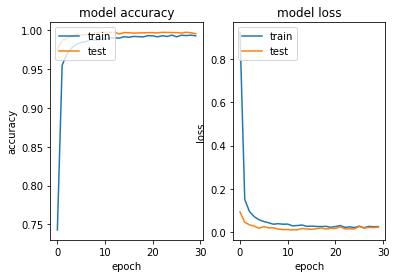

In [4]:
def get_model():
    model = keras.models.Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(800, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(43, activation='softmax'))
    return model


# Check to see if we have already trained the model
MODEL_NAME = "cnn_grayscale.h5"

model = get_model()
if os.path.exists(MODEL_NAME):
    print("Loading existing model. If you want to retrain, delete the file: " + MODEL_NAME)
    model = keras.models.load_model(MODEL_NAME)
else:
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits=True),
                  metrics=['accuracy'])
    history = model.fit(train_images, train_labels, epochs=30,
                        validation_data=(test_images, test_labels))

    # summarize history for accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # summarize history for loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    # After plotting, lets save the model to a HDF5 file
    model.save(MODEL_NAME)

In [5]:
TEST_DATA_PATH = os.path.join(DATA_DIR, "Final_Test/Images")

def readTrafficSignsTest(rootpath: str) -> typing.Tuple[list[cv.Mat], list[str]]:
    '''Reads traffic sign data for German Traffic Sign Recognition Benchmark.

    Arguments: path to the traffic sign data, for example './GTSRB/Training'
    Returns:   list of images, list of corresponding labels'''
    images = [] # images
    labels = [] # corresponding labels
    # loop over all 42 classes
    with open(os.path.join(rootpath, 'GT-final_test.csv')) as gtFile:
        gtReader = csv.reader(gtFile, delimiter=';') # csv parser for annotations file
        next(gtReader) # skip header
        # loop over all images in current annotations file
        for row in gtReader:
            file_link = os.path.join(rootpath, row[0])
            image = cv.imread(file_link) # read image, the 1th column is the filename
            # image = cv.resize(image, (32,32)) # resize to 32x32
            # image = cv.cvtColor(image, cv.COLOR_BGR2GRAY) # convert to grayscale
            images.append(image)
            labels.append(row[7]) # the 8th column is the label
    return images, labels

def run_model_on_data(model: keras.Model, images: list[cv.Mat], labels: list[str]) -> dict[str, float]:
    """_summary_: Runs the model on the given images and labels.

    Args:
        model (keras.Model): The model to run on the images.
        images (list[cv.Mat]): The images to run on. These should already be processed.
        labels (list[str]): The labels to run on.

    Returns:
        A dictionary with two keys: 'accuracy' and 'loss'.
    """
    test_images = np.array(images).astype(np.float32) # this allows us to convert it to a tensor
    test_images = test_images/255 # Everyone seems to do this so we will too!!!
    test_labels = np.array(labels).astype(np.float32)

    assert len(test_images) == len(test_labels)

    result = model.evaluate(test_images, test_labels)
    return dict(zip(model.metrics_names, result))


real_test_images, real_test_labels = readTrafficSignsTest(TEST_DATA_PATH)
processed_test_images = process_images(real_test_images)

result_dict = run_model_on_data(model, processed_test_images, real_test_labels)
print(result_dict)

395/395 [==============================] - 2s 4ms/step - loss: 0.2122 - accuracy: 0.9698
{'loss': 0.21220843493938446, 'accuracy': 0.9697545766830444}


## Results
Our model using grayscale images had an accuracy of $0.9697545766830444%$ and a loss of $0.21220843493938446$

This is not as accurate as our model trained with color images. 

We suspect that color plays an important role in classification for our model. Thus, by removing this dimetion,
we are removing important classification information. 
Thus, we will continue to use color images for training and testing.